# Task 2.1 Static logit + model code design

Here we build a codebase that would be typical in working with any structural model using static RUM model as an testbed example:

1. Model definition object and "model parts"
2. Solver
3. Simulator
4. Graphical module
5. Estimator (not today)
6. Counter factual simulator (not today)

A good way to modularize the code is to separate the main components of the model in classes and functions from the *run* scripts that call these functions to do stuff.

**Model specification**

Consider two specifications of static RUM model with EV1 random terms:
1. Linear utility of the form $u(d,x)=Y^d \beta^x$ where $Y^d$ is the vector of attributes of alternative $d$ and $\beta^x$ is the vector of structural parameters associated with the state (of the decision maker) $x$.  Let $x \in \{1,2\}$ and $\beta^1 = \beta$, $\beta^2 = \beta/2$ with $\beta$ the vector of structural parameters
2. Non-linear utility of the form $u(d,x)=\ln(Y^d) \beta^x$ with the same specification for $\beta^x$

**Coding tasks**:
1. Develop the model class to hold the parameters of the model, test its functionality
2. Write the solver of the model, make sure the logit is demaxed
3. Write graphical routine to show model solution
  - bar plot showing choice probabilities for each value of the state
4. Write the simulator of the model (to simulate a given N number of decision makers)
5. Write graphical routine to show simulated data from the model
  - bar plot showing histogram of simulated choices for each value of the state
6. Create dashboard to visualize model attributes, solution and simulations
  - alternative attributes
  - structural coefficients
  - choice probabilities (solution) by state
  - histograms of simulated choices by state

**Model understanding tasks**:
1. Explore the role of each $\beta$ parameter of the linear model using dashboard
2. Explore the role of $\sigma$ parameter of the model using dashboard
3. Explore the difference between predicted and simulated behavior
4. Is it possible to find parameter values such that all simulated choices concentrate on one alternative?
5. Is it possible to mimic the behavior of decision maker is state $x=1$ using state $x=2$ and a different set of parameters?
6. Do answers to the above questions change in the non-linear model?

Tip: use of previous examples and AI assistance speeds up work 😉

In [20]:
# Class to store model parameters
import numpy as np

class model:
  '''Class to hold RUM model specifications'''

  def __init__(
      self,
      label='noname',
      nalt=1,           # number of alternatives
      nattr=1,          # number of attributes for each alternative
      attr=[],          # values of alternative attributes (Y)
      param=[],         # structural parameters of the model (beta)
      st=[],            # state of the decision maker (X)
      sigma=1.0):
    '''Create model with default parameters'''
    # store parameters in the mode object
    self.label = label
    self.nalt = nalt
    self.nattr = nattr
    self.attr = attr
    self.param = param
    self.st = st
    self.sigma = sigma

  def __str__(self):
    '''String representation of the model'''
    # Human readable representation of the model
    return 'Human readable representation of the model'

  def __setattr__(self, attr: str, value):
    '''Check consistency of the class attributes'''

    if attr == 'attr': assert (value.shape == (self.nalt, self.nattr))
    super().__setattr__(attr, value)

  # Model parts
  def beta_coef(self, x:int):
      return self.param/2.0 if x == 2 else self.param

  def utility(self):
    '''Specification of the deterministic component of utility'''
    pass

  def save_chpr(selt):
    '''Stores computed choice probabilities (solution) in the model object'''

def model_solve(m: model):
  '''Solver for the the model, returns optimal choice probabilities'''
  # Store the solution as part of model object
  pass

def model_simulate(m: model):
  '''Simulator for the the model, returns simulated data'''
  pass

attr = np.random.rand(3,2)
beta = np.random.rand(3)
mod = model(nalt=3, nattr=2, attr=attr, param=beta)
# mod.beta_coef(1)
mod.param

array([0.8585175 , 0.66862842, 0.06116409])

In [11]:
def plot_choice_probabilities(m: model):
  '''Plot choice probabilities for the model'''
  pass

def plot_simulated_data(m: model):
  '''Plot simulated data from the model'''
  pass

def plot_dashboard(m:model):
  '''Create dashboard for model visualization'''
  pass

In [12]:
# run script to call model functions

m1 = model() # default parameters
m2 = model(x=[1.2, 3.4])
m1.nattr = 3

print(m1,m2,sep='\n')
print(m1.label)


TypeError: model.__init__() got an unexpected keyword argument 'x'

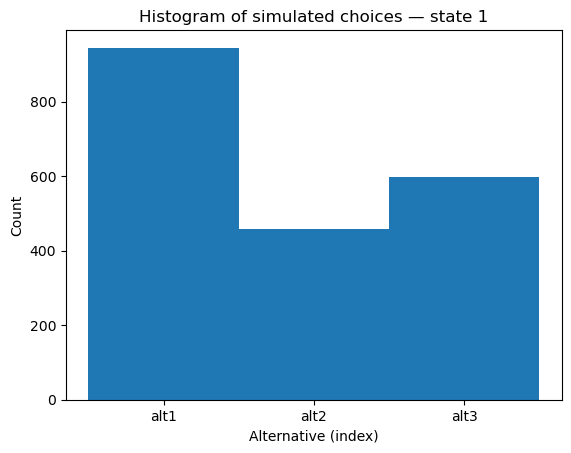

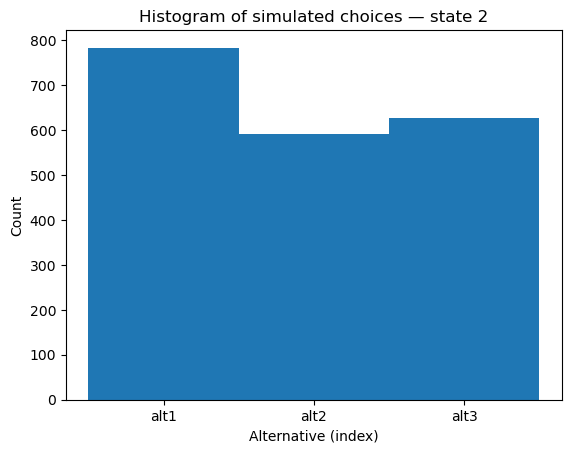

In [7]:
import numpy as np
from static_rum_toolkit import model, model_solve, model_simulate, plot_simulated_data

Y = np.array([[2.0, 1.0],
              [1.0, 3.0],
              [1.6, 1.4]])
beta = np.array([0.9, 0.2])

m = model(label='my-rum', nalt=3, nattr=2, attr=Y, param=beta, st=[1,2], sigma=0.7, spec='linear')
model_simulate(m)
plot_simulated_data(m)
